In [289]:
import os
import sys
import random
import warnings

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from tqdm import tqdm
from itertools import chain
from skimage.io import imread, imshow, imread_collection, concatenate_images
from skimage.transform import resize
from skimage.morphology import label
from keras.layers.normalization import BatchNormalization
from keras.models import Model, load_model
from keras.layers import Input
from keras.layers.core import Dropout, Lambda
from keras.layers.convolutional import Conv2D, Conv2DTranspose, UpSampling2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
import tensorflow as tf

In [318]:
IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3
MASK_PATH = 'C://Users//sahan//ipthw//Melanoma_segmentation//data//mask'
Image_PATH = 'C://Users//sahan//ipthw//Melanoma_segmentation//data//train'
VALID_PATH = 'C://Users//sahan//ipthw//Melanoma_segmentation//data//val'
Test_PATH = 'C://Users//sahan//ipthw//Melanoma_segmentation//data//test'
warnings.filterwarnings('ignore', category=UserWarning, module='skimage')
seed = 42
random.seed = seed
np.random.seed = seed

In [319]:
mask_ids = next(os.walk(MASK_PATH))[2]
image_ids = next(os.walk(Image_PATH))[2]
val_ids = next(os.walk(VALID_PATH))[2]
test_ids = next(os.walk(Test_PATH))[2]
mask_ids[1]

'ISIC_0000001_segmentation.png'

In [320]:
X_train = np.zeros((len(mask_ids), IMG_HEIGHT, IMG_WIDTH, 3), dtype=np.float32)

In [321]:
Y_train = np.zeros((len(mask_ids), IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)

In [322]:
Valid = np.zeros((len(val_ids), IMG_HEIGHT, IMG_WIDTH, 3), dtype=np.float32)

In [323]:
img = imread(MASK_PATH  + '//' + mask_ids[1])
img.ndim
    

2

In [324]:
sys.stdout.flush()
for n, id_ in tqdm(enumerate(image_ids), total=len(image_ids)):
    path = Image_PATH
    img = imread(path + '//' + id_)[:,:,:IMG_CHANNELS]
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=False)
    X_train[n] = img
    











  0%|                                                                                         | 0/2594 [00:00<?, ?it/s]








  0%|                                                                                 | 4/2594 [00:00<01:19, 32.61it/s]








  0%|▏                                                                                | 8/2594 [00:00<01:18, 32.77it/s]








  0%|▎                                                                               | 12/2594 [00:00<01:17, 33.21it/s]








  1%|▍                                                                               | 15/2594 [00:00<01:25, 30.17it/s]








  1%|▌                                                                               | 18/2594 [00:00<01:47, 23.89it/s]








  1%|▋                                                                               | 21/2594 [00:00<02:03, 20.90it/s]








  1%|▋                                                                               | 23/2594 

  4%|███▌                                                                           | 116/2594 [00:09<05:17,  7.80it/s]








  5%|███▌                                                                           | 117/2594 [00:09<05:13,  7.91it/s]








  5%|███▌                                                                           | 118/2594 [00:09<05:11,  7.94it/s]








  5%|███▌                                                                           | 119/2594 [00:09<05:10,  7.98it/s]








  5%|███▋                                                                           | 120/2594 [00:09<05:10,  7.96it/s]








  5%|███▋                                                                           | 121/2594 [00:09<05:18,  7.77it/s]








  5%|███▋                                                                           | 122/2594 [00:10<05:13,  7.88it/s]








  5%|███▋                                                                           | 123/2594 [00:10<05

 12%|█████████▏                                                                     | 303/2594 [00:17<00:54, 42.23it/s]








 12%|█████████▍                                                                     | 308/2594 [00:17<00:54, 42.09it/s]








 12%|█████████▌                                                                     | 313/2594 [00:18<00:53, 42.53it/s]








 12%|█████████▋                                                                     | 318/2594 [00:18<00:53, 42.63it/s]








 12%|█████████▊                                                                     | 323/2594 [00:18<01:47, 21.20it/s]








 13%|█████████▉                                                                     | 327/2594 [00:19<03:21, 11.23it/s]








 13%|██████████                                                                     | 330/2594 [00:19<04:18,  8.76it/s]








 13%|██████████                                                                     | 332/2594 [00:20<05

 17%|█████████████▏                                                                 | 434/2594 [00:33<02:28, 14.53it/s]








 17%|█████████████▎                                                                 | 438/2594 [00:33<02:03, 17.43it/s]








 17%|█████████████▍                                                                 | 443/2594 [00:33<01:41, 21.25it/s]








 17%|█████████████▋                                                                 | 448/2594 [00:33<01:25, 25.15it/s]








 17%|█████████████▊                                                                 | 453/2594 [00:33<01:14, 28.81it/s]








 18%|█████████████▉                                                                 | 458/2594 [00:33<01:05, 32.38it/s]








 18%|██████████████                                                                 | 463/2594 [00:35<03:25, 10.35it/s]








 18%|██████████████▏                                                                | 466/2594 [00:36<05

 20%|████████████████                                                               | 529/2594 [00:54<10:52,  3.17it/s]








 20%|████████████████▏                                                              | 530/2594 [00:54<12:31,  2.75it/s]








 20%|████████████████▏                                                              | 531/2594 [00:54<11:14,  3.06it/s]








 21%|████████████████▏                                                              | 532/2594 [00:55<12:44,  2.70it/s]








 21%|████████████████▏                                                              | 533/2594 [00:55<13:40,  2.51it/s]








 21%|████████████████▎                                                              | 534/2594 [00:55<12:02,  2.85it/s]








 21%|████████████████▎                                                              | 535/2594 [00:56<13:19,  2.58it/s]








 21%|████████████████▎                                                              | 536/2594 [00:56<14

 23%|██████████████████                                                             | 593/2594 [01:15<09:39,  3.45it/s]








 23%|██████████████████                                                             | 594/2594 [01:15<09:07,  3.65it/s]








 23%|██████████████████                                                             | 595/2594 [01:16<08:47,  3.79it/s]








 23%|██████████████████▏                                                            | 596/2594 [01:16<08:36,  3.87it/s]








 23%|██████████████████▏                                                            | 597/2594 [01:16<08:28,  3.93it/s]








 23%|██████████████████▏                                                            | 598/2594 [01:16<08:21,  3.98it/s]








 23%|██████████████████▏                                                            | 599/2594 [01:17<10:38,  3.13it/s]








 23%|██████████████████▎                                                            | 600/2594 [01:17<09

 26%|████████████████████▉                                                          | 687/2594 [01:38<01:21, 23.32it/s]








 27%|█████████████████████                                                          | 691/2594 [01:38<01:15, 25.31it/s]








 27%|█████████████████████▏                                                         | 695/2594 [01:38<01:10, 26.91it/s]








 27%|█████████████████████▎                                                         | 699/2594 [01:38<01:07, 28.04it/s]








 27%|█████████████████████▍                                                         | 703/2594 [01:38<01:05, 28.83it/s]








 27%|█████████████████████▌                                                         | 707/2594 [01:39<01:03, 29.60it/s]








 27%|█████████████████████▋                                                         | 711/2594 [01:39<01:01, 30.38it/s]








 28%|█████████████████████▊                                                         | 715/2594 [01:39<01

 36%|████████████████████████████▋                                                  | 943/2594 [01:46<00:52, 31.65it/s]








 37%|████████████████████████████▊                                                  | 947/2594 [01:46<00:51, 31.86it/s]








 37%|████████████████████████████▉                                                  | 951/2594 [01:46<00:52, 31.51it/s]








 37%|█████████████████████████████                                                  | 955/2594 [01:46<00:51, 31.79it/s]








 37%|█████████████████████████████▏                                                 | 959/2594 [01:47<00:51, 31.96it/s]








 37%|█████████████████████████████▎                                                 | 963/2594 [01:47<00:50, 32.23it/s]








 37%|█████████████████████████████▍                                                 | 967/2594 [01:47<00:50, 32.11it/s]








 37%|█████████████████████████████▌                                                 | 971/2594 [01:47<00

 45%|███████████████████████████████████▍                                          | 1180/2594 [01:58<05:34,  4.23it/s]








 46%|███████████████████████████████████▌                                          | 1181/2594 [01:58<05:32,  4.25it/s]








 46%|███████████████████████████████████▌                                          | 1182/2594 [01:58<05:34,  4.22it/s]








 46%|███████████████████████████████████▌                                          | 1183/2594 [01:58<05:37,  4.17it/s]








 46%|███████████████████████████████████▌                                          | 1184/2594 [01:59<05:37,  4.18it/s]








 46%|███████████████████████████████████▋                                          | 1185/2594 [01:59<05:35,  4.19it/s]








 46%|███████████████████████████████████▋                                          | 1186/2594 [01:59<05:34,  4.21it/s]








 46%|███████████████████████████████████▋                                          | 1187/2594 [01:59<05

 48%|█████████████████████████████████████▍                                        | 1244/2594 [02:19<09:13,  2.44it/s]








 48%|█████████████████████████████████████▍                                        | 1245/2594 [02:19<08:05,  2.78it/s]








 48%|█████████████████████████████████████▍                                        | 1246/2594 [02:20<08:57,  2.51it/s]








 48%|█████████████████████████████████████▍                                        | 1247/2594 [02:20<09:27,  2.37it/s]








 48%|█████████████████████████████████████▌                                        | 1248/2594 [02:20<08:14,  2.72it/s]








 48%|█████████████████████████████████████▌                                        | 1249/2594 [02:21<07:24,  3.03it/s]








 48%|█████████████████████████████████████▌                                        | 1250/2594 [02:21<08:23,  2.67it/s]








 48%|█████████████████████████████████████▌                                        | 1251/2594 [02:21<07

 50%|███████████████████████████████████████▎                                      | 1308/2594 [02:38<07:25,  2.88it/s]








 50%|███████████████████████████████████████▎                                      | 1309/2594 [02:39<08:16,  2.59it/s]








 51%|███████████████████████████████████████▍                                      | 1310/2594 [02:39<08:53,  2.41it/s]








 51%|███████████████████████████████████████▍                                      | 1311/2594 [02:40<09:12,  2.32it/s]








 51%|███████████████████████████████████████▍                                      | 1312/2594 [02:40<09:26,  2.26it/s]








 51%|███████████████████████████████████████▍                                      | 1313/2594 [02:41<09:30,  2.25it/s]








 51%|███████████████████████████████████████▌                                      | 1314/2594 [02:41<09:40,  2.20it/s]








 51%|███████████████████████████████████████▌                                      | 1315/2594 [02:42<09

 53%|█████████████████████████████████████████▎                                    | 1372/2594 [03:01<04:53,  4.17it/s]








 53%|█████████████████████████████████████████▎                                    | 1373/2594 [03:01<04:54,  4.15it/s]








 53%|█████████████████████████████████████████▎                                    | 1374/2594 [03:01<04:53,  4.16it/s]








 53%|█████████████████████████████████████████▎                                    | 1375/2594 [03:02<05:00,  4.06it/s]








 53%|█████████████████████████████████████████▍                                    | 1376/2594 [03:02<05:03,  4.02it/s]








 53%|█████████████████████████████████████████▍                                    | 1377/2594 [03:02<05:07,  3.95it/s]








 53%|█████████████████████████████████████████▍                                    | 1378/2594 [03:02<05:11,  3.91it/s]








 53%|█████████████████████████████████████████▍                                    | 1379/2594 [03:03<05

 55%|███████████████████████████████████████████▏                                  | 1437/2594 [03:19<07:06,  2.72it/s]








 55%|███████████████████████████████████████████▏                                  | 1438/2594 [03:19<06:21,  3.03it/s]








 55%|███████████████████████████████████████████▎                                  | 1439/2594 [03:20<05:51,  3.29it/s]








 56%|███████████████████████████████████████████▎                                  | 1440/2594 [03:20<06:22,  3.02it/s]








 56%|███████████████████████████████████████████▎                                  | 1441/2594 [03:20<05:50,  3.29it/s]








 56%|███████████████████████████████████████████▎                                  | 1442/2594 [03:21<05:29,  3.50it/s]








 56%|███████████████████████████████████████████▍                                  | 1443/2594 [03:21<05:13,  3.67it/s]








 56%|███████████████████████████████████████████▍                                  | 1444/2594 [03:21<05

 58%|█████████████████████████████████████████████▏                                | 1501/2594 [03:39<06:27,  2.82it/s]








 58%|█████████████████████████████████████████████▏                                | 1502/2594 [03:40<06:40,  2.73it/s]








 58%|█████████████████████████████████████████████▏                                | 1503/2594 [03:40<06:02,  3.01it/s]








 58%|█████████████████████████████████████████████▏                                | 1504/2594 [03:41<06:26,  2.82it/s]








 58%|█████████████████████████████████████████████▎                                | 1505/2594 [03:41<06:37,  2.74it/s]








 58%|█████████████████████████████████████████████▎                                | 1506/2594 [03:41<06:29,  2.79it/s]








 58%|█████████████████████████████████████████████▎                                | 1507/2594 [03:42<06:36,  2.74it/s]








 58%|█████████████████████████████████████████████▎                                | 1508/2594 [03:42<05

 60%|███████████████████████████████████████████████                               | 1565/2594 [03:59<04:20,  3.95it/s]








 60%|███████████████████████████████████████████████                               | 1566/2594 [03:59<04:16,  4.01it/s]








 60%|███████████████████████████████████████████████                               | 1567/2594 [03:59<04:15,  4.02it/s]








 60%|███████████████████████████████████████████████▏                              | 1568/2594 [03:59<04:14,  4.03it/s]








 60%|███████████████████████████████████████████████▏                              | 1569/2594 [03:59<04:13,  4.04it/s]








 61%|███████████████████████████████████████████████▏                              | 1570/2594 [04:00<04:15,  4.00it/s]








 61%|███████████████████████████████████████████████▏                              | 1571/2594 [04:00<04:16,  3.99it/s]








 61%|███████████████████████████████████████████████▎                              | 1572/2594 [04:00<04

 63%|████████████████████████████████████████████████▉                             | 1629/2594 [04:24<07:50,  2.05it/s]








 63%|█████████████████████████████████████████████████                             | 1630/2594 [04:25<07:57,  2.02it/s]








 63%|█████████████████████████████████████████████████                             | 1631/2594 [04:25<07:54,  2.03it/s]








 63%|█████████████████████████████████████████████████                             | 1632/2594 [04:26<07:52,  2.04it/s]








 63%|█████████████████████████████████████████████████                             | 1633/2594 [04:26<07:59,  2.00it/s]








 63%|█████████████████████████████████████████████████▏                            | 1634/2594 [04:27<07:56,  2.02it/s]








 63%|█████████████████████████████████████████████████▏                            | 1635/2594 [04:27<07:55,  2.01it/s]








 63%|█████████████████████████████████████████████████▏                            | 1636/2594 [04:28<07

 65%|██████████████████████████████████████████████████▉                           | 1693/2594 [04:53<06:45,  2.22it/s]








 65%|██████████████████████████████████████████████████▉                           | 1694/2594 [04:53<05:48,  2.58it/s]








 65%|██████████████████████████████████████████████████▉                           | 1695/2594 [04:54<05:08,  2.92it/s]








 65%|██████████████████████████████████████████████████▉                           | 1696/2594 [04:54<04:39,  3.21it/s]








 65%|███████████████████████████████████████████████████                           | 1697/2594 [04:54<04:21,  3.44it/s]








 65%|███████████████████████████████████████████████████                           | 1698/2594 [04:55<05:11,  2.87it/s]








 65%|███████████████████████████████████████████████████                           | 1699/2594 [04:55<05:49,  2.56it/s]








 66%|███████████████████████████████████████████████████                           | 1700/2594 [04:56<06

 68%|████████████████████████████████████████████████████▊                         | 1757/2594 [05:19<05:32,  2.52it/s]








 68%|████████████████████████████████████████████████████▊                         | 1758/2594 [05:20<04:56,  2.82it/s]








 68%|████████████████████████████████████████████████████▉                         | 1759/2594 [05:20<04:28,  3.10it/s]








 68%|████████████████████████████████████████████████████▉                         | 1760/2594 [05:20<05:12,  2.67it/s]








 68%|████████████████████████████████████████████████████▉                         | 1761/2594 [05:21<05:44,  2.42it/s]








 68%|████████████████████████████████████████████████████▉                         | 1762/2594 [05:21<06:04,  2.28it/s]








 68%|█████████████████████████████████████████████████████                         | 1763/2594 [05:22<05:15,  2.63it/s]








 68%|█████████████████████████████████████████████████████                         | 1764/2594 [05:22<05

 70%|██████████████████████████████████████████████████████▊                       | 1821/2594 [05:45<05:29,  2.35it/s]








 70%|██████████████████████████████████████████████████████▊                       | 1822/2594 [05:45<05:42,  2.25it/s]








 70%|██████████████████████████████████████████████████████▊                       | 1823/2594 [05:46<05:50,  2.20it/s]








 70%|██████████████████████████████████████████████████████▊                       | 1824/2594 [05:46<05:00,  2.56it/s]








 70%|██████████████████████████████████████████████████████▉                       | 1825/2594 [05:46<05:21,  2.39it/s]








 70%|██████████████████████████████████████████████████████▉                       | 1826/2594 [05:47<04:40,  2.73it/s]








 70%|██████████████████████████████████████████████████████▉                       | 1827/2594 [05:47<04:11,  3.05it/s]








 70%|██████████████████████████████████████████████████████▉                       | 1828/2594 [05:47<03

 73%|████████████████████████████████████████████████████████▋                     | 1885/2594 [06:10<04:00,  2.95it/s]








 73%|████████████████████████████████████████████████████████▋                     | 1886/2594 [06:10<04:34,  2.58it/s]








 73%|████████████████████████████████████████████████████████▋                     | 1887/2594 [06:11<04:53,  2.41it/s]








 73%|████████████████████████████████████████████████████████▊                     | 1888/2594 [06:11<05:10,  2.27it/s]








 73%|████████████████████████████████████████████████████████▊                     | 1889/2594 [06:12<05:15,  2.24it/s]








 73%|████████████████████████████████████████████████████████▊                     | 1890/2594 [06:12<05:19,  2.20it/s]








 73%|████████████████████████████████████████████████████████▊                     | 1891/2594 [06:13<05:16,  2.22it/s]








 73%|████████████████████████████████████████████████████████▉                     | 1892/2594 [06:13<05

 75%|██████████████████████████████████████████████████████████▌                   | 1949/2594 [06:40<04:59,  2.15it/s]








 75%|██████████████████████████████████████████████████████████▋                   | 1950/2594 [06:40<04:58,  2.16it/s]








 75%|██████████████████████████████████████████████████████████▋                   | 1951/2594 [06:41<05:01,  2.13it/s]








 75%|██████████████████████████████████████████████████████████▋                   | 1952/2594 [06:41<04:59,  2.15it/s]








 75%|██████████████████████████████████████████████████████████▋                   | 1953/2594 [06:41<04:59,  2.14it/s]








 75%|██████████████████████████████████████████████████████████▊                   | 1954/2594 [06:42<04:59,  2.14it/s]








 75%|██████████████████████████████████████████████████████████▊                   | 1955/2594 [06:42<04:57,  2.15it/s]








 75%|██████████████████████████████████████████████████████████▊                   | 1956/2594 [06:43<05

 78%|████████████████████████████████████████████████████████████▌                 | 2013/2594 [07:10<04:32,  2.14it/s]








 78%|████████████████████████████████████████████████████████████▌                 | 2014/2594 [07:10<04:30,  2.15it/s]








 78%|████████████████████████████████████████████████████████████▌                 | 2015/2594 [07:10<04:27,  2.17it/s]








 78%|████████████████████████████████████████████████████████████▌                 | 2016/2594 [07:11<04:26,  2.17it/s]








 78%|████████████████████████████████████████████████████████████▋                 | 2017/2594 [07:11<04:26,  2.16it/s]








 78%|████████████████████████████████████████████████████████████▋                 | 2018/2594 [07:12<04:25,  2.17it/s]








 78%|████████████████████████████████████████████████████████████▋                 | 2019/2594 [07:12<04:25,  2.17it/s]








 78%|████████████████████████████████████████████████████████████▋                 | 2020/2594 [07:13<04

 80%|██████████████████████████████████████████████████████████████▍               | 2077/2594 [07:33<01:37,  5.33it/s]








 80%|██████████████████████████████████████████████████████████████▍               | 2078/2594 [07:33<01:38,  5.26it/s]








 80%|██████████████████████████████████████████████████████████████▌               | 2079/2594 [07:33<01:37,  5.31it/s]








 80%|██████████████████████████████████████████████████████████████▌               | 2080/2594 [07:34<01:35,  5.35it/s]








 80%|██████████████████████████████████████████████████████████████▌               | 2081/2594 [07:34<01:35,  5.35it/s]








 80%|██████████████████████████████████████████████████████████████▌               | 2082/2594 [07:34<01:35,  5.37it/s]








 80%|██████████████████████████████████████████████████████████████▋               | 2083/2594 [07:34<01:34,  5.40it/s]








 80%|██████████████████████████████████████████████████████████████▋               | 2084/2594 [07:34<01

 83%|████████████████████████████████████████████████████████████████▍             | 2141/2594 [08:46<09:59,  1.32s/it]








 83%|████████████████████████████████████████████████████████████████▍             | 2142/2594 [08:48<09:57,  1.32s/it]








 83%|████████████████████████████████████████████████████████████████▍             | 2143/2594 [08:49<09:54,  1.32s/it]








 83%|████████████████████████████████████████████████████████████████▍             | 2144/2594 [08:50<09:55,  1.32s/it]








 83%|████████████████████████████████████████████████████████████████▍             | 2145/2594 [08:52<09:51,  1.32s/it]








 83%|████████████████████████████████████████████████████████████████▌             | 2146/2594 [08:53<09:54,  1.33s/it]








 83%|████████████████████████████████████████████████████████████████▌             | 2147/2594 [08:54<09:55,  1.33s/it]








 83%|████████████████████████████████████████████████████████████████▌             | 2148/2594 [08:56<09

 85%|██████████████████████████████████████████████████████████████████▎           | 2205/2594 [10:11<08:22,  1.29s/it]








 85%|██████████████████████████████████████████████████████████████████▎           | 2206/2594 [10:12<08:30,  1.32s/it]








 85%|██████████████████████████████████████████████████████████████████▎           | 2207/2594 [10:14<08:32,  1.32s/it]








 85%|██████████████████████████████████████████████████████████████████▍           | 2208/2594 [10:15<08:33,  1.33s/it]








 85%|██████████████████████████████████████████████████████████████████▍           | 2209/2594 [10:16<08:34,  1.34s/it]








 85%|██████████████████████████████████████████████████████████████████▍           | 2210/2594 [10:18<08:33,  1.34s/it]








 85%|██████████████████████████████████████████████████████████████████▍           | 2211/2594 [10:19<08:32,  1.34s/it]








 85%|██████████████████████████████████████████████████████████████████▌           | 2212/2594 [10:20<08

 87%|████████████████████████████████████████████████████████████████████▏         | 2269/2594 [11:38<07:25,  1.37s/it]








 88%|████████████████████████████████████████████████████████████████████▎         | 2270/2594 [11:39<07:22,  1.37s/it]








 88%|████████████████████████████████████████████████████████████████████▎         | 2271/2594 [11:40<07:19,  1.36s/it]








 88%|████████████████████████████████████████████████████████████████████▎         | 2272/2594 [11:42<07:18,  1.36s/it]








 88%|████████████████████████████████████████████████████████████████████▎         | 2273/2594 [11:43<07:19,  1.37s/it]








 88%|████████████████████████████████████████████████████████████████████▍         | 2274/2594 [11:45<07:14,  1.36s/it]








 88%|████████████████████████████████████████████████████████████████████▍         | 2275/2594 [11:46<07:12,  1.36s/it]








 88%|████████████████████████████████████████████████████████████████████▍         | 2276/2594 [11:47<07

 90%|██████████████████████████████████████████████████████████████████████▏       | 2333/2594 [13:03<05:52,  1.35s/it]








 90%|██████████████████████████████████████████████████████████████████████▏       | 2334/2594 [13:04<05:51,  1.35s/it]








 90%|██████████████████████████████████████████████████████████████████████▏       | 2335/2594 [13:06<05:50,  1.35s/it]








 90%|██████████████████████████████████████████████████████████████████████▏       | 2336/2594 [13:07<05:51,  1.36s/it]








 90%|██████████████████████████████████████████████████████████████████████▎       | 2337/2594 [13:08<05:50,  1.37s/it]








 90%|██████████████████████████████████████████████████████████████████████▎       | 2338/2594 [13:10<05:45,  1.35s/it]








 90%|██████████████████████████████████████████████████████████████████████▎       | 2339/2594 [13:11<05:45,  1.35s/it]








 90%|██████████████████████████████████████████████████████████████████████▎       | 2340/2594 [13:12<05

 92%|████████████████████████████████████████████████████████████████████████      | 2397/2594 [14:28<04:26,  1.35s/it]








 92%|████████████████████████████████████████████████████████████████████████      | 2398/2594 [14:29<04:25,  1.36s/it]








 92%|████████████████████████████████████████████████████████████████████████▏     | 2399/2594 [14:31<04:22,  1.35s/it]








 93%|████████████████████████████████████████████████████████████████████████▏     | 2400/2594 [14:32<04:22,  1.35s/it]








 93%|████████████████████████████████████████████████████████████████████████▏     | 2401/2594 [14:33<04:21,  1.35s/it]








 93%|████████████████████████████████████████████████████████████████████████▏     | 2402/2594 [14:35<04:20,  1.36s/it]








 93%|████████████████████████████████████████████████████████████████████████▎     | 2403/2594 [14:36<04:22,  1.37s/it]








 93%|████████████████████████████████████████████████████████████████████████▎     | 2404/2594 [14:37<04

 95%|██████████████████████████████████████████████████████████████████████████    | 2461/2594 [15:54<02:56,  1.33s/it]








 95%|██████████████████████████████████████████████████████████████████████████    | 2462/2594 [15:55<02:56,  1.33s/it]








 95%|██████████████████████████████████████████████████████████████████████████    | 2463/2594 [15:57<02:54,  1.33s/it]








 95%|██████████████████████████████████████████████████████████████████████████    | 2464/2594 [15:58<02:53,  1.34s/it]








 95%|██████████████████████████████████████████████████████████████████████████    | 2465/2594 [15:59<02:53,  1.34s/it]








 95%|██████████████████████████████████████████████████████████████████████████▏   | 2466/2594 [16:01<02:52,  1.34s/it]








 95%|██████████████████████████████████████████████████████████████████████████▏   | 2467/2594 [16:02<02:50,  1.34s/it]








 95%|██████████████████████████████████████████████████████████████████████████▏   | 2468/2594 [16:03<02

 97%|███████████████████████████████████████████████████████████████████████████▉  | 2527/2594 [16:29<00:18,  3.60it/s]








 97%|████████████████████████████████████████████████████████████████████████████  | 2528/2594 [16:29<00:20,  3.15it/s]








 97%|████████████████████████████████████████████████████████████████████████████  | 2529/2594 [16:30<00:19,  3.35it/s]








 98%|████████████████████████████████████████████████████████████████████████████  | 2530/2594 [16:30<00:18,  3.47it/s]








 98%|████████████████████████████████████████████████████████████████████████████  | 2531/2594 [16:30<00:20,  3.09it/s]








 98%|████████████████████████████████████████████████████████████████████████████▏ | 2532/2594 [16:31<00:21,  2.86it/s]








 98%|████████████████████████████████████████████████████████████████████████████▏ | 2533/2594 [16:31<00:19,  3.08it/s]








 98%|████████████████████████████████████████████████████████████████████████████▏ | 2534/2594 [16:31<00

100%|█████████████████████████████████████████████████████████████████████████████▉| 2591/2594 [16:58<00:01,  2.00it/s]








100%|█████████████████████████████████████████████████████████████████████████████▉| 2592/2594 [16:59<00:01,  1.98it/s]








100%|█████████████████████████████████████████████████████████████████████████████▉| 2593/2594 [16:59<00:00,  1.99it/s]








100%|██████████████████████████████████████████████████████████████████████████████| 2594/2594 [17:00<00:00,  1.99it/s]










In [325]:
for n, id_ in tqdm(enumerate(mask_ids), total=len(image_ids)):
    mask_ = imread(MASK_PATH +'//'+id_)
    mask_ = np.expand_dims(resize(mask_, (IMG_HEIGHT, IMG_WIDTH), mode='constant', 
                                      preserve_range=False), axis=-1)
    
    Y_train[n] = mask_










  0%|                                                                                         | 0/2594 [00:00<?, ?it/s]








  1%|▍                                                                              | 15/2594 [00:00<00:19, 134.88it/s]








  1%|▋                                                                              | 23/2594 [00:00<00:24, 106.41it/s]








  1%|▉                                                                               | 31/2594 [00:00<00:27, 93.51it/s]








  2%|█▏                                                                              | 39/2594 [00:00<00:29, 85.79it/s]








  2%|█▍                                                                              | 47/2594 [00:00<00:31, 80.97it/s]








  2%|█▋                                                                              | 55/2594 [00:00<00:32, 78.03it/s]








  2%|█▉                                                                              | 62/2594 

 21%|████████████████▍                                                              | 538/2594 [00:11<02:19, 14.73it/s]








 21%|████████████████▍                                                              | 540/2594 [00:11<02:18, 14.83it/s]








 21%|████████████████▌                                                              | 542/2594 [00:11<02:17, 14.91it/s]








 21%|████████████████▌                                                              | 544/2594 [00:12<02:17, 14.96it/s]








 21%|████████████████▋                                                              | 546/2594 [00:12<02:17, 14.93it/s]








 21%|████████████████▋                                                              | 549/2594 [00:12<02:11, 15.52it/s]








 21%|████████████████▊                                                              | 552/2594 [00:12<01:59, 17.10it/s]








 21%|████████████████▉                                                              | 555/2594 [00:12<02

 33%|█████████████████████████▋                                                    | 855/2594 [00:20<00:13, 131.60it/s]








 34%|██████████████████████████▏                                                   | 870/2594 [00:20<00:12, 134.53it/s]








 34%|██████████████████████████▌                                                   | 885/2594 [00:20<00:12, 137.40it/s]








 35%|███████████████████████████                                                   | 900/2594 [00:20<00:12, 139.88it/s]








 35%|███████████████████████████▌                                                  | 915/2594 [00:20<00:12, 138.15it/s]








 36%|███████████████████████████▉                                                  | 930/2594 [00:20<00:11, 140.82it/s]








 36%|████████████████████████████▍                                                 | 945/2594 [00:21<00:11, 142.74it/s]








 37%|████████████████████████████▊                                                 | 960/2594 [00:21<00:

 50%|███████████████████████████████████████▎                                      | 1308/2594 [00:30<01:20, 15.93it/s]








 51%|███████████████████████████████████████▍                                      | 1310/2594 [00:30<01:30, 14.20it/s]








 51%|███████████████████████████████████████▍                                      | 1312/2594 [00:31<01:37, 13.12it/s]








 51%|███████████████████████████████████████▌                                      | 1314/2594 [00:31<01:41, 12.60it/s]








 51%|███████████████████████████████████████▌                                      | 1316/2594 [00:31<01:36, 13.25it/s]








 51%|███████████████████████████████████████▋                                      | 1318/2594 [00:31<01:42, 12.42it/s]








 51%|███████████████████████████████████████▋                                      | 1320/2594 [00:31<01:45, 12.05it/s]








 51%|███████████████████████████████████████▊                                      | 1322/2594 [00:31<01

 57%|████████████████████████████████████████████▏                                 | 1468/2594 [00:40<01:09, 16.20it/s]








 57%|████████████████████████████████████████████▏                                 | 1470/2594 [00:40<01:08, 16.51it/s]








 57%|████████████████████████████████████████████▎                                 | 1472/2594 [00:40<01:11, 15.59it/s]








 57%|████████████████████████████████████████████▎                                 | 1474/2594 [00:40<01:10, 15.98it/s]








 57%|████████████████████████████████████████████▍                                 | 1477/2594 [00:40<01:07, 16.60it/s]








 57%|████████████████████████████████████████████▍                                 | 1479/2594 [00:40<01:11, 15.62it/s]








 57%|████████████████████████████████████████████▌                                 | 1482/2594 [00:40<01:04, 17.34it/s]








 57%|████████████████████████████████████████████▋                                 | 1485/2594 [00:41<00

 62%|████████████████████████████████████████████████▌                             | 1616/2594 [00:48<01:25, 11.48it/s]








 62%|████████████████████████████████████████████████▋                             | 1618/2594 [00:49<01:25, 11.47it/s]








 62%|████████████████████████████████████████████████▋                             | 1620/2594 [00:49<01:24, 11.46it/s]








 63%|████████████████████████████████████████████████▊                             | 1622/2594 [00:49<01:25, 11.39it/s]








 63%|████████████████████████████████████████████████▊                             | 1624/2594 [00:49<01:25, 11.36it/s]








 63%|████████████████████████████████████████████████▉                             | 1626/2594 [00:49<01:24, 11.42it/s]








 63%|████████████████████████████████████████████████▉                             | 1628/2594 [00:50<01:25, 11.33it/s]








 63%|█████████████████████████████████████████████████                             | 1630/2594 [00:50<01

 67%|████████████████████████████████████████████████████▌                         | 1750/2594 [00:59<01:09, 12.22it/s]








 68%|████████████████████████████████████████████████████▋                         | 1752/2594 [00:59<01:05, 12.88it/s]








 68%|████████████████████████████████████████████████████▋                         | 1754/2594 [00:59<01:08, 12.33it/s]








 68%|████████████████████████████████████████████████████▊                         | 1756/2594 [00:59<01:04, 13.09it/s]








 68%|████████████████████████████████████████████████████▊                         | 1758/2594 [01:00<00:59, 14.09it/s]








 68%|████████████████████████████████████████████████████▉                         | 1760/2594 [01:00<00:58, 14.37it/s]








 68%|████████████████████████████████████████████████████▉                         | 1762/2594 [01:00<01:02, 13.35it/s]








 68%|█████████████████████████████████████████████████████                         | 1764/2594 [01:00<00

 73%|████████████████████████████████████████████████████████▊                     | 1888/2594 [01:09<00:52, 13.33it/s]








 73%|████████████████████████████████████████████████████████▊                     | 1890/2594 [01:09<00:55, 12.63it/s]








 73%|████████████████████████████████████████████████████████▉                     | 1892/2594 [01:09<00:57, 12.26it/s]








 73%|████████████████████████████████████████████████████████▉                     | 1894/2594 [01:09<00:58, 11.92it/s]








 73%|█████████████████████████████████████████████████████████                     | 1896/2594 [01:10<00:59, 11.66it/s]








 73%|█████████████████████████████████████████████████████████                     | 1898/2594 [01:10<01:00, 11.58it/s]








 73%|█████████████████████████████████████████████████████████▏                    | 1900/2594 [01:10<00:59, 11.58it/s]








 73%|█████████████████████████████████████████████████████████▏                    | 1902/2594 [01:10<01

 78%|████████████████████████████████████████████████████████████▌                 | 2016/2594 [01:20<00:50, 11.34it/s]








 78%|████████████████████████████████████████████████████████████▋                 | 2018/2594 [01:20<00:51, 11.27it/s]








 78%|████████████████████████████████████████████████████████████▋                 | 2020/2594 [01:21<00:50, 11.29it/s]








 78%|████████████████████████████████████████████████████████████▊                 | 2022/2594 [01:21<00:50, 11.28it/s]








 78%|████████████████████████████████████████████████████████████▊                 | 2024/2594 [01:21<00:50, 11.31it/s]








 78%|████████████████████████████████████████████████████████████▉                 | 2026/2594 [01:21<00:50, 11.34it/s]








 78%|████████████████████████████████████████████████████████████▉                 | 2028/2594 [01:21<00:49, 11.34it/s]








 78%|█████████████████████████████████████████████████████████████                 | 2030/2594 [01:21<00

 82%|███████████████████████████████████████████████████████████████▉              | 2126/2594 [01:33<01:41,  4.61it/s]








 82%|███████████████████████████████████████████████████████████████▉              | 2127/2594 [01:33<01:42,  4.54it/s]








 82%|███████████████████████████████████████████████████████████████▉              | 2128/2594 [01:34<01:42,  4.54it/s]








 82%|████████████████████████████████████████████████████████████████              | 2129/2594 [01:34<01:41,  4.59it/s]








 82%|████████████████████████████████████████████████████████████████              | 2130/2594 [01:34<01:40,  4.63it/s]








 82%|████████████████████████████████████████████████████████████████              | 2131/2594 [01:34<01:41,  4.55it/s]








 82%|████████████████████████████████████████████████████████████████              | 2132/2594 [01:34<01:40,  4.61it/s]








 82%|████████████████████████████████████████████████████████████████▏             | 2133/2594 [01:35<01

 84%|█████████████████████████████████████████████████████████████████▊            | 2190/2594 [01:47<01:24,  4.76it/s]








 84%|█████████████████████████████████████████████████████████████████▉            | 2191/2594 [01:47<01:25,  4.72it/s]








 85%|█████████████████████████████████████████████████████████████████▉            | 2192/2594 [01:47<01:24,  4.73it/s]








 85%|█████████████████████████████████████████████████████████████████▉            | 2193/2594 [01:47<01:24,  4.72it/s]








 85%|█████████████████████████████████████████████████████████████████▉            | 2194/2594 [01:48<01:26,  4.64it/s]








 85%|██████████████████████████████████████████████████████████████████            | 2195/2594 [01:48<01:25,  4.65it/s]








 85%|██████████████████████████████████████████████████████████████████            | 2196/2594 [01:48<01:24,  4.71it/s]








 85%|██████████████████████████████████████████████████████████████████            | 2197/2594 [01:48<01

 87%|███████████████████████████████████████████████████████████████████▊          | 2254/2594 [02:01<01:14,  4.57it/s]








 87%|███████████████████████████████████████████████████████████████████▊          | 2255/2594 [02:01<01:14,  4.58it/s]








 87%|███████████████████████████████████████████████████████████████████▊          | 2256/2594 [02:01<01:12,  4.65it/s]








 87%|███████████████████████████████████████████████████████████████████▊          | 2257/2594 [02:01<01:11,  4.71it/s]








 87%|███████████████████████████████████████████████████████████████████▉          | 2258/2594 [02:01<01:11,  4.68it/s]








 87%|███████████████████████████████████████████████████████████████████▉          | 2259/2594 [02:02<01:14,  4.52it/s]








 87%|███████████████████████████████████████████████████████████████████▉          | 2260/2594 [02:02<01:13,  4.52it/s]








 87%|███████████████████████████████████████████████████████████████████▉          | 2261/2594 [02:02<01

 89%|█████████████████████████████████████████████████████████████████████▋        | 2318/2594 [02:14<00:59,  4.63it/s]








 89%|█████████████████████████████████████████████████████████████████████▋        | 2319/2594 [02:15<00:59,  4.59it/s]








 89%|█████████████████████████████████████████████████████████████████████▊        | 2320/2594 [02:15<00:59,  4.60it/s]








 89%|█████████████████████████████████████████████████████████████████████▊        | 2321/2594 [02:15<00:58,  4.64it/s]








 90%|█████████████████████████████████████████████████████████████████████▊        | 2322/2594 [02:15<00:57,  4.71it/s]








 90%|█████████████████████████████████████████████████████████████████████▊        | 2323/2594 [02:16<00:57,  4.73it/s]








 90%|█████████████████████████████████████████████████████████████████████▉        | 2324/2594 [02:16<00:58,  4.59it/s]








 90%|█████████████████████████████████████████████████████████████████████▉        | 2325/2594 [02:16<00

 92%|███████████████████████████████████████████████████████████████████████▋      | 2382/2594 [02:28<00:45,  4.63it/s]








 92%|███████████████████████████████████████████████████████████████████████▋      | 2383/2594 [02:28<00:46,  4.57it/s]








 92%|███████████████████████████████████████████████████████████████████████▋      | 2384/2594 [02:29<00:45,  4.63it/s]








 92%|███████████████████████████████████████████████████████████████████████▋      | 2385/2594 [02:29<00:44,  4.68it/s]








 92%|███████████████████████████████████████████████████████████████████████▋      | 2386/2594 [02:29<00:44,  4.71it/s]








 92%|███████████████████████████████████████████████████████████████████████▊      | 2387/2594 [02:29<00:43,  4.75it/s]








 92%|███████████████████████████████████████████████████████████████████████▊      | 2388/2594 [02:30<00:43,  4.75it/s]








 92%|███████████████████████████████████████████████████████████████████████▊      | 2389/2594 [02:30<00

 94%|█████████████████████████████████████████████████████████████████████████▌    | 2446/2594 [02:42<00:31,  4.65it/s]








 94%|█████████████████████████████████████████████████████████████████████████▌    | 2447/2594 [02:42<00:31,  4.62it/s]








 94%|█████████████████████████████████████████████████████████████████████████▌    | 2448/2594 [02:43<00:31,  4.60it/s]








 94%|█████████████████████████████████████████████████████████████████████████▋    | 2449/2594 [02:43<00:31,  4.60it/s]








 94%|█████████████████████████████████████████████████████████████████████████▋    | 2450/2594 [02:43<00:31,  4.54it/s]








 94%|█████████████████████████████████████████████████████████████████████████▋    | 2451/2594 [02:43<00:31,  4.56it/s]








 95%|█████████████████████████████████████████████████████████████████████████▋    | 2452/2594 [02:43<00:31,  4.55it/s]








 95%|█████████████████████████████████████████████████████████████████████████▊    | 2453/2594 [02:44<00

 99%|████████████████████████████████████████████████████████████████████████████▉ | 2559/2594 [02:54<00:02, 12.82it/s]








 99%|█████████████████████████████████████████████████████████████████████████████ | 2561/2594 [02:54<00:02, 12.18it/s]








 99%|█████████████████████████████████████████████████████████████████████████████ | 2563/2594 [02:54<00:02, 11.89it/s]








 99%|█████████████████████████████████████████████████████████████████████████████▏| 2565/2594 [02:54<00:02, 12.68it/s]








 99%|█████████████████████████████████████████████████████████████████████████████▏| 2567/2594 [02:54<00:02, 13.28it/s]








 99%|█████████████████████████████████████████████████████████████████████████████▏| 2569/2594 [02:55<00:01, 12.65it/s]








 99%|█████████████████████████████████████████████████████████████████████████████▎| 2571/2594 [02:55<00:01, 13.62it/s]








 99%|█████████████████████████████████████████████████████████████████████████████▎| 2573/2594 [02:55<00

In [326]:
val_test = np.zeros((len(val_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.float32)
sizes_valid = []

for n, id_ in tqdm(enumerate(val_ids), total=len(val_ids)):
    path = VALID_PATH
    img = imread(path + '//'+  id_)[:,:,:IMG_CHANNELS]
    sizes_valid.append([img.shape[0], img.shape[1]])
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=False)
    val_test[n] = img

print('Done!')










  0%|                                                                                          | 0/100 [00:00<?, ?it/s]








  1%|▊                                                                                 | 1/100 [00:00<00:49,  2.00it/s]








  2%|█▋                                                                                | 2/100 [00:00<00:41,  2.35it/s]








  6%|████▉                                                                             | 6/100 [00:00<00:28,  3.25it/s]








  9%|███████▍                                                                          | 9/100 [00:02<00:32,  2.79it/s]








 10%|████████                                                                         | 10/100 [00:03<00:58,  1.54it/s]








 11%|████████▉                                                                        | 11/100 [00:04<01:16,  1.17it/s]








 12%|█████████▋                                                                       | 12/100 

Done!


In [327]:
TEST = np.zeros((len(val_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.float32)
sizes_valid = []

for n, id_ in tqdm(enumerate(test_ids)):
    path = Test_PATH
    img = imread(path + '//'+  id_)[:,:,:IMG_CHANNELS]
    sizes_valid.append([img.shape[0], img.shape[1]])
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=False)
    TEST[n] = img

print('Done!')










0it [00:00, ?it/s]








1it [00:00,  3.83it/s]








2it [00:00,  3.02it/s]








3it [00:01,  3.27it/s]








4it [00:01,  3.45it/s]








5it [00:01,  3.54it/s]








6it [00:02,  2.85it/s]








7it [00:02,  3.13it/s]








8it [00:02,  2.65it/s]








9it [00:03,  2.40it/s]








10it [00:03,  2.28it/s]








11it [00:04,  2.19it/s]








15it [00:04,  3.03it/s]








18it [00:04,  4.15it/s]








22it [00:04,  5.60it/s]








26it [00:04,  7.41it/s]








29it [00:04,  9.55it/s]








33it [00:05, 10.00it/s]








36it [00:05,  6.90it/s]








38it [00:07,  3.01it/s]








40it [00:10,  1.54it/s]








41it [00:11,  1.15it/s]








42it [00:13,  1.02s/it]








43it [00:14,  1.12s/it]








44it [00:15,  1.22s/it]








45it [00:17,  1.28s/it]








46it [00:18,  1.31s/it]








47it [00:20,  1.33s/it]








48it [00:21,  1.35s/it]








49it [00:22,  1.37s/it]








50it [00:24,  1.37s/it]








51it [00:25, 

IndexError: index 100 is out of bounds for axis 0 with size 100

(2594, 128, 128, 1)


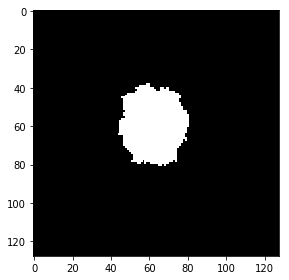

In [328]:
print(Y_train.shape)
imshow(np.squeeze(Y_train[1]))
plt.show()


In [329]:
#https://github.com/kamalkraj/DATA-SCIENCE-BOWL-2018/blob/master/Data_Science_Bowl_2018.ipynb
def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + 1) / (K.sum(y_true_f) + K.sum(y_pred_f) + 1)

# Loss funtion
def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)

In [330]:
def lossfunc(y_true, y_pred):
    return - 1 * jaccard(y_true, y_pred)

In [334]:
def unet(IMG_WIDTH=128,IMG_HEIGHT=128,IMG_CHANNELS=3):
    inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
    s = Lambda(lambda x: x / 255) (inputs)
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = BatchNormalization(axis=3)(conv1)
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(conv1)
    conv1 = BatchNormalization(axis=3)(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    
    conv2 = Conv2D(128, 3, activation='relu', padding='same')(pool1)
    conv2 = BatchNormalization(axis=3)(conv2)
    conv2 = Conv2D(128, 3, activation='relu', padding='same')(conv2)
    conv2 = BatchNormalization(axis=3)(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    
    conv3 = Conv2D(256, 3, activation='relu', padding='same')(pool2)
    conv3 = BatchNormalization(axis=3)(conv3)
    conv3 = Conv2D(256, 3, activation='relu', padding='same')(conv3)
    conv3 = BatchNormalization(axis=3)(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3) 
    
    conv4 = Conv2D(512, 3, activation='relu', padding='same')(pool3)
    conv4 = BatchNormalization(axis=3)(conv4)
    conv4 = Conv2D(512, 3, activation='relu', padding='same')(conv4)
    conv4 = BatchNormalization(axis=3)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(Dropout(0.2)(conv4))
    
    conv5 = Conv2D(1024, 3, activation='relu', padding='same')(pool4)
    conv5 = BatchNormalization(axis=3)(conv5)
    conv5 = Conv2D(1024, 3, activation='relu', padding='same')(conv5)
    conv5 = BatchNormalization(axis=3)(conv5)
    
    middle = Dropout(0.2)(conv5)
    

    up6 = Conv2D(512, 2, activation='relu', padding='same')(UpSampling2D()(middle)) 
    up6 = BatchNormalization(axis=3)(up6) 
    concat6 = concatenate([conv4, up6])
    conv6 = Conv2D(512, 3, activation='relu', padding='same')(concat6)
    conv6 = BatchNormalization(axis=3)(conv6)
    conv6 = Conv2D(512, 3, activation='relu', padding='same')(conv6)
    conv6 = BatchNormalization(axis=3)(conv6)
   
   
    
    up7 = Conv2D(256, 2, activation='relu', padding='same')(UpSampling2D()(conv6))
    up7 = BatchNormalization(axis=3)(up7)
    concat7 = concatenate([conv3, up7])
    conv7 = Conv2D(256, 3, activation='relu', padding='same')(concat7)
    conv7 = BatchNormalization(axis=3)(conv7)
    conv7 = Conv2D(256, 3, activation='relu', padding='same')(conv7)
    conv7 = BatchNormalization(axis=3)(conv7)

    
    
    up8 = Conv2D(128, 2, activation='relu', padding='same')(UpSampling2D()(conv7)) 
    up8 = BatchNormalization(axis=3)(up8)
    concat8 = concatenate([conv2, up8])
    conv8 = Conv2D(128, 3, activation='relu', padding='same')(concat8)
    conv8 = BatchNormalization(axis=3)(conv8)
    conv8 = Conv2D(128, 3, activation='relu', padding='same')(conv8)
    conv8 = BatchNormalization(axis=3)(conv8)

    
    
    up9 = Conv2D(64, 2, activation='relu', padding='same')(UpSampling2D()(conv8)) 
    up9 = BatchNormalization(axis=3)(up9)
    concat9 = concatenate([conv1, up9])
    conv9 = Conv2D(64, 3, activation='relu', padding='same')(concat9)
    conv9 = BatchNormalization(axis=3)(conv9)
    conv9 = Conv2D(64, 3, activation='relu', padding='same')(conv9)
    conv9 = BatchNormalization(axis=3)(conv9)

    
    conv10 = Conv2D(1, 1, activation='sigmoid', padding='same')(conv9)
    
    model = Model(inputs=[inputs], outputs=[conv10])
    
    model.compile(optimizer=RMSprop(lr=1e-4),loss='binary_crossentropy', metrics=[dice_coef])
    
    
    return model

In [335]:
from keras.optimizers import RMSprop
earlystopper = EarlyStopping(patience=5, verbose=1)

optim = RMSprop(lr = 0.0001, decay = 1e-6)
model = unet()

In [336]:
results = model.fit(X_train, Y_train, batch_size=32, epochs=50)

Epoch 1/50
2594/2594 [==============================] - ETA: 12:37 - loss: 0.7993 - dice_coef: 0.40 - ETA: 6:23 - loss: 0.7683 - dice_coef: 0.3990 - ETA: 4:18 - loss: 0.7226 - dice_coef: 0.418 - ETA: 3:15 - loss: 0.6858 - dice_coef: 0.422 - ETA: 2:38 - loss: 0.6572 - dice_coef: 0.435 - ETA: 2:12 - loss: 0.6293 - dice_coef: 0.451 - ETA: 1:54 - loss: 0.6142 - dice_coef: 0.460 - ETA: 1:41 - loss: 0.5982 - dice_coef: 0.470 - ETA: 1:30 - loss: 0.5829 - dice_coef: 0.475 - ETA: 1:22 - loss: 0.5647 - dice_coef: 0.482 - ETA: 1:15 - loss: 0.5570 - dice_coef: 0.486 - ETA: 1:09 - loss: 0.5474 - dice_coef: 0.493 - ETA: 1:04 - loss: 0.5481 - dice_coef: 0.489 - ETA: 59s - loss: 0.5435 - dice_coef: 0.486 - ETA: 55s - loss: 0.5346 - dice_coef: 0.49 - ETA: 52s - loss: 0.5269 - dice_coef: 0.49 - ETA: 49s - loss: 0.5168 - dice_coef: 0.49 - ETA: 46s - loss: 0.5162 - dice_coef: 0.50 - ETA: 44s - loss: 0.5117 - dice_coef: 0.50 - ETA: 42s - loss: 0.5081 - dice_coef: 0.50 - ETA: 40s - loss: 0.5045 - dice_coef:

2594/2594 [==============================] - ETA: 18s - loss: 0.2571 - dice_coef: 0.64 - ETA: 18s - loss: 0.2150 - dice_coef: 0.68 - ETA: 18s - loss: 0.2208 - dice_coef: 0.68 - ETA: 17s - loss: 0.2122 - dice_coef: 0.69 - ETA: 17s - loss: 0.2131 - dice_coef: 0.69 - ETA: 17s - loss: 0.2148 - dice_coef: 0.70 - ETA: 17s - loss: 0.2112 - dice_coef: 0.71 - ETA: 16s - loss: 0.2113 - dice_coef: 0.71 - ETA: 16s - loss: 0.2081 - dice_coef: 0.71 - ETA: 16s - loss: 0.2090 - dice_coef: 0.71 - ETA: 16s - loss: 0.2071 - dice_coef: 0.71 - ETA: 16s - loss: 0.2093 - dice_coef: 0.71 - ETA: 15s - loss: 0.2110 - dice_coef: 0.71 - ETA: 15s - loss: 0.2108 - dice_coef: 0.71 - ETA: 15s - loss: 0.2150 - dice_coef: 0.71 - ETA: 15s - loss: 0.2174 - dice_coef: 0.70 - ETA: 14s - loss: 0.2154 - dice_coef: 0.71 - ETA: 14s - loss: 0.2127 - dice_coef: 0.71 - ETA: 14s - loss: 0.2109 - dice_coef: 0.71 - ETA: 14s - loss: 0.2109 - dice_coef: 0.71 - ETA: 13s - loss: 0.2113 - dice_coef: 0.71 - ETA: 13s - loss: 0.2136 - dice_

2594/2594 [==============================] - ETA: 18s - loss: 0.2188 - dice_coef: 0.74 - ETA: 18s - loss: 0.2153 - dice_coef: 0.72 - ETA: 18s - loss: 0.1923 - dice_coef: 0.73 - ETA: 17s - loss: 0.1804 - dice_coef: 0.75 - ETA: 17s - loss: 0.1693 - dice_coef: 0.75 - ETA: 17s - loss: 0.1657 - dice_coef: 0.76 - ETA: 17s - loss: 0.1641 - dice_coef: 0.76 - ETA: 16s - loss: 0.1647 - dice_coef: 0.76 - ETA: 16s - loss: 0.1614 - dice_coef: 0.77 - ETA: 16s - loss: 0.1580 - dice_coef: 0.77 - ETA: 16s - loss: 0.1547 - dice_coef: 0.78 - ETA: 16s - loss: 0.1500 - dice_coef: 0.79 - ETA: 15s - loss: 0.1554 - dice_coef: 0.78 - ETA: 15s - loss: 0.1580 - dice_coef: 0.78 - ETA: 15s - loss: 0.1577 - dice_coef: 0.78 - ETA: 15s - loss: 0.1583 - dice_coef: 0.78 - ETA: 14s - loss: 0.1576 - dice_coef: 0.78 - ETA: 14s - loss: 0.1569 - dice_coef: 0.78 - ETA: 14s - loss: 0.1569 - dice_coef: 0.78 - ETA: 14s - loss: 0.1557 - dice_coef: 0.79 - ETA: 13s - loss: 0.1542 - dice_coef: 0.79 - ETA: 13s - loss: 0.1582 - dice_

2594/2594 [==============================] - ETA: 18s - loss: 0.1340 - dice_coef: 0.78 - ETA: 18s - loss: 0.1193 - dice_coef: 0.81 - ETA: 18s - loss: 0.1207 - dice_coef: 0.79 - ETA: 17s - loss: 0.1135 - dice_coef: 0.80 - ETA: 17s - loss: 0.1222 - dice_coef: 0.79 - ETA: 17s - loss: 0.1231 - dice_coef: 0.79 - ETA: 17s - loss: 0.1216 - dice_coef: 0.79 - ETA: 17s - loss: 0.1195 - dice_coef: 0.79 - ETA: 16s - loss: 0.1169 - dice_coef: 0.79 - ETA: 16s - loss: 0.1197 - dice_coef: 0.79 - ETA: 16s - loss: 0.1185 - dice_coef: 0.80 - ETA: 16s - loss: 0.1190 - dice_coef: 0.80 - ETA: 15s - loss: 0.1210 - dice_coef: 0.80 - ETA: 15s - loss: 0.1254 - dice_coef: 0.79 - ETA: 15s - loss: 0.1266 - dice_coef: 0.79 - ETA: 15s - loss: 0.1281 - dice_coef: 0.79 - ETA: 14s - loss: 0.1294 - dice_coef: 0.79 - ETA: 14s - loss: 0.1274 - dice_coef: 0.79 - ETA: 14s - loss: 0.1272 - dice_coef: 0.80 - ETA: 14s - loss: 0.1270 - dice_coef: 0.80 - ETA: 14s - loss: 0.1258 - dice_coef: 0.80 - ETA: 13s - loss: 0.1305 - dice_

2594/2594 [==============================] - ETA: 18s - loss: 0.1411 - dice_coef: 0.80 - ETA: 18s - loss: 0.1431 - dice_coef: 0.79 - ETA: 18s - loss: 0.1457 - dice_coef: 0.77 - ETA: 17s - loss: 0.1342 - dice_coef: 0.78 - ETA: 17s - loss: 0.1299 - dice_coef: 0.79 - ETA: 17s - loss: 0.1364 - dice_coef: 0.80 - ETA: 17s - loss: 0.1431 - dice_coef: 0.78 - ETA: 16s - loss: 0.1374 - dice_coef: 0.79 - ETA: 16s - loss: 0.1313 - dice_coef: 0.80 - ETA: 16s - loss: 0.1310 - dice_coef: 0.80 - ETA: 16s - loss: 0.1280 - dice_coef: 0.80 - ETA: 16s - loss: 0.1242 - dice_coef: 0.81 - ETA: 15s - loss: 0.1277 - dice_coef: 0.81 - ETA: 15s - loss: 0.1271 - dice_coef: 0.81 - ETA: 15s - loss: 0.1253 - dice_coef: 0.81 - ETA: 15s - loss: 0.1234 - dice_coef: 0.81 - ETA: 14s - loss: 0.1228 - dice_coef: 0.81 - ETA: 14s - loss: 0.1210 - dice_coef: 0.81 - ETA: 14s - loss: 0.1192 - dice_coef: 0.82 - ETA: 14s - loss: 0.1188 - dice_coef: 0.82 - ETA: 14s - loss: 0.1171 - dice_coef: 0.82 - ETA: 13s - loss: 0.1158 - dice_

2594/2594 [==============================] - ETA: 18s - loss: 0.1735 - dice_coef: 0.77 - ETA: 18s - loss: 0.1329 - dice_coef: 0.81 - ETA: 18s - loss: 0.1259 - dice_coef: 0.82 - ETA: 17s - loss: 0.1185 - dice_coef: 0.82 - ETA: 17s - loss: 0.1118 - dice_coef: 0.82 - ETA: 17s - loss: 0.1065 - dice_coef: 0.83 - ETA: 17s - loss: 0.1032 - dice_coef: 0.84 - ETA: 17s - loss: 0.1031 - dice_coef: 0.84 - ETA: 16s - loss: 0.1014 - dice_coef: 0.84 - ETA: 16s - loss: 0.0991 - dice_coef: 0.84 - ETA: 16s - loss: 0.0996 - dice_coef: 0.84 - ETA: 16s - loss: 0.0989 - dice_coef: 0.84 - ETA: 15s - loss: 0.0972 - dice_coef: 0.85 - ETA: 15s - loss: 0.0976 - dice_coef: 0.85 - ETA: 15s - loss: 0.0964 - dice_coef: 0.85 - ETA: 15s - loss: 0.0954 - dice_coef: 0.85 - ETA: 14s - loss: 0.0964 - dice_coef: 0.85 - ETA: 14s - loss: 0.0966 - dice_coef: 0.85 - ETA: 14s - loss: 0.0954 - dice_coef: 0.85 - ETA: 14s - loss: 0.0950 - dice_coef: 0.85 - ETA: 14s - loss: 0.0953 - dice_coef: 0.85 - ETA: 13s - loss: 0.0947 - dice_

2594/2594 [==============================] - ETA: 18s - loss: 0.1241 - dice_coef: 0.84 - ETA: 18s - loss: 0.1108 - dice_coef: 0.85 - ETA: 18s - loss: 0.1020 - dice_coef: 0.85 - ETA: 17s - loss: 0.0983 - dice_coef: 0.85 - ETA: 17s - loss: 0.0962 - dice_coef: 0.85 - ETA: 17s - loss: 0.0926 - dice_coef: 0.85 - ETA: 17s - loss: 0.0921 - dice_coef: 0.85 - ETA: 17s - loss: 0.0932 - dice_coef: 0.85 - ETA: 16s - loss: 0.0924 - dice_coef: 0.86 - ETA: 16s - loss: 0.0899 - dice_coef: 0.86 - ETA: 16s - loss: 0.0888 - dice_coef: 0.86 - ETA: 16s - loss: 0.0880 - dice_coef: 0.86 - ETA: 15s - loss: 0.0870 - dice_coef: 0.86 - ETA: 15s - loss: 0.0852 - dice_coef: 0.87 - ETA: 15s - loss: 0.0870 - dice_coef: 0.86 - ETA: 15s - loss: 0.0930 - dice_coef: 0.86 - ETA: 14s - loss: 0.0921 - dice_coef: 0.86 - ETA: 14s - loss: 0.0911 - dice_coef: 0.86 - ETA: 14s - loss: 0.0898 - dice_coef: 0.87 - ETA: 14s - loss: 0.0891 - dice_coef: 0.87 - ETA: 14s - loss: 0.0892 - dice_coef: 0.87 - ETA: 13s - loss: 0.0892 - dice_

2594/2594 [==============================] - ETA: 21s - loss: 0.0733 - dice_coef: 0.86 - ETA: 25s - loss: 0.0999 - dice_coef: 0.86 - ETA: 24s - loss: 0.0963 - dice_coef: 0.87 - ETA: 22s - loss: 0.0895 - dice_coef: 0.88 - ETA: 21s - loss: 0.0839 - dice_coef: 0.88 - ETA: 20s - loss: 0.0805 - dice_coef: 0.88 - ETA: 19s - loss: 0.0786 - dice_coef: 0.88 - ETA: 19s - loss: 0.0769 - dice_coef: 0.88 - ETA: 18s - loss: 0.0807 - dice_coef: 0.88 - ETA: 18s - loss: 0.0798 - dice_coef: 0.88 - ETA: 17s - loss: 0.0795 - dice_coef: 0.88 - ETA: 17s - loss: 0.0781 - dice_coef: 0.88 - ETA: 17s - loss: 0.0771 - dice_coef: 0.88 - ETA: 16s - loss: 0.0763 - dice_coef: 0.89 - ETA: 16s - loss: 0.0759 - dice_coef: 0.89 - ETA: 16s - loss: 0.0751 - dice_coef: 0.89 - ETA: 15s - loss: 0.0742 - dice_coef: 0.89 - ETA: 15s - loss: 0.0736 - dice_coef: 0.89 - ETA: 15s - loss: 0.0733 - dice_coef: 0.89 - ETA: 15s - loss: 0.0731 - dice_coef: 0.89 - ETA: 14s - loss: 0.0731 - dice_coef: 0.89 - ETA: 14s - loss: 0.0726 - dice_

2594/2594 [==============================] - ETA: 18s - loss: 0.0808 - dice_coef: 0.85 - ETA: 20s - loss: 0.0765 - dice_coef: 0.86 - ETA: 19s - loss: 0.0709 - dice_coef: 0.87 - ETA: 18s - loss: 0.0674 - dice_coef: 0.87 - ETA: 18s - loss: 0.0820 - dice_coef: 0.88 - ETA: 18s - loss: 0.0803 - dice_coef: 0.87 - ETA: 17s - loss: 0.0798 - dice_coef: 0.88 - ETA: 17s - loss: 0.0781 - dice_coef: 0.88 - ETA: 17s - loss: 0.0763 - dice_coef: 0.88 - ETA: 17s - loss: 0.0743 - dice_coef: 0.89 - ETA: 16s - loss: 0.0725 - dice_coef: 0.89 - ETA: 16s - loss: 0.0737 - dice_coef: 0.89 - ETA: 16s - loss: 0.0721 - dice_coef: 0.89 - ETA: 16s - loss: 0.0715 - dice_coef: 0.89 - ETA: 15s - loss: 0.0711 - dice_coef: 0.89 - ETA: 15s - loss: 0.0698 - dice_coef: 0.89 - ETA: 15s - loss: 0.0691 - dice_coef: 0.89 - ETA: 15s - loss: 0.0701 - dice_coef: 0.89 - ETA: 14s - loss: 0.0696 - dice_coef: 0.89 - ETA: 14s - loss: 0.0687 - dice_coef: 0.89 - ETA: 14s - loss: 0.0687 - dice_coef: 0.90 - ETA: 14s - loss: 0.0683 - dice_

2594/2594 [==============================] - ETA: 18s - loss: 0.0721 - dice_coef: 0.91 - ETA: 18s - loss: 0.0668 - dice_coef: 0.91 - ETA: 18s - loss: 0.0691 - dice_coef: 0.91 - ETA: 18s - loss: 0.0750 - dice_coef: 0.91 - ETA: 17s - loss: 0.0745 - dice_coef: 0.91 - ETA: 17s - loss: 0.0707 - dice_coef: 0.91 - ETA: 17s - loss: 0.0684 - dice_coef: 0.91 - ETA: 17s - loss: 0.0695 - dice_coef: 0.91 - ETA: 16s - loss: 0.0694 - dice_coef: 0.91 - ETA: 16s - loss: 0.0691 - dice_coef: 0.91 - ETA: 16s - loss: 0.0677 - dice_coef: 0.91 - ETA: 16s - loss: 0.0719 - dice_coef: 0.90 - ETA: 15s - loss: 0.0708 - dice_coef: 0.90 - ETA: 15s - loss: 0.0696 - dice_coef: 0.89 - ETA: 15s - loss: 0.0685 - dice_coef: 0.90 - ETA: 15s - loss: 0.0681 - dice_coef: 0.90 - ETA: 14s - loss: 0.0680 - dice_coef: 0.90 - ETA: 14s - loss: 0.0679 - dice_coef: 0.90 - ETA: 14s - loss: 0.0670 - dice_coef: 0.90 - ETA: 14s - loss: 0.0659 - dice_coef: 0.90 - ETA: 14s - loss: 0.0654 - dice_coef: 0.90 - ETA: 13s - loss: 0.0648 - dice_

2594/2594 [==============================] - ETA: 18s - loss: 0.1088 - dice_coef: 0.91 - ETA: 18s - loss: 0.0849 - dice_coef: 0.91 - ETA: 18s - loss: 0.0761 - dice_coef: 0.91 - ETA: 20s - loss: 0.0696 - dice_coef: 0.91 - ETA: 19s - loss: 0.0649 - dice_coef: 0.91 - ETA: 19s - loss: 0.0633 - dice_coef: 0.91 - ETA: 18s - loss: 0.0625 - dice_coef: 0.91 - ETA: 18s - loss: 0.0615 - dice_coef: 0.91 - ETA: 17s - loss: 0.0609 - dice_coef: 0.91 - ETA: 17s - loss: 0.0609 - dice_coef: 0.91 - ETA: 17s - loss: 0.0596 - dice_coef: 0.91 - ETA: 16s - loss: 0.0587 - dice_coef: 0.91 - ETA: 16s - loss: 0.0587 - dice_coef: 0.91 - ETA: 16s - loss: 0.0579 - dice_coef: 0.91 - ETA: 16s - loss: 0.0574 - dice_coef: 0.91 - ETA: 15s - loss: 0.0573 - dice_coef: 0.91 - ETA: 15s - loss: 0.0575 - dice_coef: 0.91 - ETA: 15s - loss: 0.0568 - dice_coef: 0.91 - ETA: 14s - loss: 0.0566 - dice_coef: 0.91 - ETA: 14s - loss: 0.0567 - dice_coef: 0.91 - ETA: 14s - loss: 0.0573 - dice_coef: 0.91 - ETA: 14s - loss: 0.0569 - dice_

2594/2594 [==============================] - ETA: 18s - loss: 0.1127 - dice_coef: 0.90 - ETA: 18s - loss: 0.0869 - dice_coef: 0.90 - ETA: 18s - loss: 0.0730 - dice_coef: 0.91 - ETA: 17s - loss: 0.0659 - dice_coef: 0.91 - ETA: 17s - loss: 0.0616 - dice_coef: 0.91 - ETA: 17s - loss: 0.0586 - dice_coef: 0.91 - ETA: 17s - loss: 0.0615 - dice_coef: 0.89 - ETA: 17s - loss: 0.0618 - dice_coef: 0.90 - ETA: 16s - loss: 0.0611 - dice_coef: 0.90 - ETA: 16s - loss: 0.0599 - dice_coef: 0.90 - ETA: 16s - loss: 0.0580 - dice_coef: 0.91 - ETA: 16s - loss: 0.0564 - dice_coef: 0.91 - ETA: 15s - loss: 0.0559 - dice_coef: 0.91 - ETA: 15s - loss: 0.0551 - dice_coef: 0.91 - ETA: 15s - loss: 0.0544 - dice_coef: 0.91 - ETA: 15s - loss: 0.0541 - dice_coef: 0.91 - ETA: 14s - loss: 0.0539 - dice_coef: 0.91 - ETA: 14s - loss: 0.0543 - dice_coef: 0.91 - ETA: 14s - loss: 0.0541 - dice_coef: 0.91 - ETA: 14s - loss: 0.0543 - dice_coef: 0.91 - ETA: 14s - loss: 0.0547 - dice_coef: 0.91 - ETA: 13s - loss: 0.0543 - dice_

2594/2594 [==============================] - ETA: 18s - loss: 0.0492 - dice_coef: 0.93 - ETA: 18s - loss: 0.0563 - dice_coef: 0.93 - ETA: 18s - loss: 0.0553 - dice_coef: 0.92 - ETA: 17s - loss: 0.0574 - dice_coef: 0.92 - ETA: 17s - loss: 0.0567 - dice_coef: 0.92 - ETA: 17s - loss: 0.0565 - dice_coef: 0.92 - ETA: 17s - loss: 0.0549 - dice_coef: 0.92 - ETA: 17s - loss: 0.0534 - dice_coef: 0.92 - ETA: 16s - loss: 0.0520 - dice_coef: 0.92 - ETA: 16s - loss: 0.0506 - dice_coef: 0.92 - ETA: 16s - loss: 0.0496 - dice_coef: 0.92 - ETA: 16s - loss: 0.0518 - dice_coef: 0.92 - ETA: 15s - loss: 0.0526 - dice_coef: 0.92 - ETA: 15s - loss: 0.0521 - dice_coef: 0.92 - ETA: 15s - loss: 0.0518 - dice_coef: 0.92 - ETA: 15s - loss: 0.0511 - dice_coef: 0.92 - ETA: 14s - loss: 0.0511 - dice_coef: 0.92 - ETA: 14s - loss: 0.0506 - dice_coef: 0.92 - ETA: 14s - loss: 0.0502 - dice_coef: 0.92 - ETA: 14s - loss: 0.0525 - dice_coef: 0.92 - ETA: 14s - loss: 0.0532 - dice_coef: 0.92 - ETA: 13s - loss: 0.0544 - dice_

2594/2594 [==============================] - ETA: 18s - loss: 0.0470 - dice_coef: 0.93 - ETA: 18s - loss: 0.0473 - dice_coef: 0.92 - ETA: 18s - loss: 0.0458 - dice_coef: 0.93 - ETA: 18s - loss: 0.0436 - dice_coef: 0.93 - ETA: 17s - loss: 0.0438 - dice_coef: 0.93 - ETA: 17s - loss: 0.0437 - dice_coef: 0.93 - ETA: 17s - loss: 0.0431 - dice_coef: 0.93 - ETA: 17s - loss: 0.0416 - dice_coef: 0.93 - ETA: 16s - loss: 0.0419 - dice_coef: 0.93 - ETA: 16s - loss: 0.0417 - dice_coef: 0.93 - ETA: 16s - loss: 0.0418 - dice_coef: 0.93 - ETA: 16s - loss: 0.0434 - dice_coef: 0.93 - ETA: 15s - loss: 0.0450 - dice_coef: 0.93 - ETA: 15s - loss: 0.0450 - dice_coef: 0.93 - ETA: 15s - loss: 0.0445 - dice_coef: 0.93 - ETA: 15s - loss: 0.0444 - dice_coef: 0.93 - ETA: 14s - loss: 0.0446 - dice_coef: 0.93 - ETA: 14s - loss: 0.0447 - dice_coef: 0.93 - ETA: 14s - loss: 0.0443 - dice_coef: 0.93 - ETA: 14s - loss: 0.0441 - dice_coef: 0.93 - ETA: 14s - loss: 0.0441 - dice_coef: 0.93 - ETA: 13s - loss: 0.0444 - dice_

2594/2594 [==============================] - ETA: 18s - loss: 0.0617 - dice_coef: 0.91 - ETA: 18s - loss: 0.0530 - dice_coef: 0.92 - ETA: 18s - loss: 0.0492 - dice_coef: 0.92 - ETA: 18s - loss: 0.0490 - dice_coef: 0.92 - ETA: 17s - loss: 0.0471 - dice_coef: 0.92 - ETA: 17s - loss: 0.0459 - dice_coef: 0.92 - ETA: 17s - loss: 0.0438 - dice_coef: 0.92 - ETA: 17s - loss: 0.0444 - dice_coef: 0.92 - ETA: 16s - loss: 0.0438 - dice_coef: 0.92 - ETA: 16s - loss: 0.0426 - dice_coef: 0.93 - ETA: 16s - loss: 0.0419 - dice_coef: 0.93 - ETA: 16s - loss: 0.0413 - dice_coef: 0.93 - ETA: 15s - loss: 0.0408 - dice_coef: 0.93 - ETA: 15s - loss: 0.0428 - dice_coef: 0.93 - ETA: 15s - loss: 0.0436 - dice_coef: 0.93 - ETA: 15s - loss: 0.0435 - dice_coef: 0.93 - ETA: 14s - loss: 0.0439 - dice_coef: 0.93 - ETA: 14s - loss: 0.0435 - dice_coef: 0.93 - ETA: 14s - loss: 0.0435 - dice_coef: 0.93 - ETA: 14s - loss: 0.0434 - dice_coef: 0.93 - ETA: 14s - loss: 0.0431 - dice_coef: 0.93 - ETA: 13s - loss: 0.0435 - dice_

2594/2594 [==============================] - ETA: 18s - loss: 0.0576 - dice_coef: 0.92 - ETA: 18s - loss: 0.0475 - dice_coef: 0.92 - ETA: 18s - loss: 0.0439 - dice_coef: 0.93 - ETA: 17s - loss: 0.0443 - dice_coef: 0.93 - ETA: 17s - loss: 0.0450 - dice_coef: 0.93 - ETA: 17s - loss: 0.0431 - dice_coef: 0.93 - ETA: 17s - loss: 0.0435 - dice_coef: 0.93 - ETA: 17s - loss: 0.0433 - dice_coef: 0.93 - ETA: 16s - loss: 0.0432 - dice_coef: 0.93 - ETA: 16s - loss: 0.0432 - dice_coef: 0.93 - ETA: 16s - loss: 0.0426 - dice_coef: 0.93 - ETA: 16s - loss: 0.0429 - dice_coef: 0.93 - ETA: 15s - loss: 0.0429 - dice_coef: 0.93 - ETA: 15s - loss: 0.0420 - dice_coef: 0.93 - ETA: 15s - loss: 0.0420 - dice_coef: 0.93 - ETA: 15s - loss: 0.0416 - dice_coef: 0.93 - ETA: 14s - loss: 0.0414 - dice_coef: 0.93 - ETA: 14s - loss: 0.0412 - dice_coef: 0.93 - ETA: 14s - loss: 0.0419 - dice_coef: 0.93 - ETA: 14s - loss: 0.0417 - dice_coef: 0.93 - ETA: 14s - loss: 0.0414 - dice_coef: 0.93 - ETA: 13s - loss: 0.0412 - dice_

2594/2594 [==============================] - ETA: 18s - loss: 0.0512 - dice_coef: 0.89 - ETA: 18s - loss: 0.0454 - dice_coef: 0.91 - ETA: 18s - loss: 0.0417 - dice_coef: 0.92 - ETA: 17s - loss: 0.0443 - dice_coef: 0.92 - ETA: 17s - loss: 0.0429 - dice_coef: 0.93 - ETA: 17s - loss: 0.0432 - dice_coef: 0.93 - ETA: 17s - loss: 0.0426 - dice_coef: 0.93 - ETA: 17s - loss: 0.0440 - dice_coef: 0.93 - ETA: 16s - loss: 0.0449 - dice_coef: 0.93 - ETA: 16s - loss: 0.0438 - dice_coef: 0.93 - ETA: 16s - loss: 0.0444 - dice_coef: 0.93 - ETA: 16s - loss: 0.0437 - dice_coef: 0.93 - ETA: 15s - loss: 0.0432 - dice_coef: 0.93 - ETA: 15s - loss: 0.0425 - dice_coef: 0.93 - ETA: 15s - loss: 0.0419 - dice_coef: 0.93 - ETA: 15s - loss: 0.0415 - dice_coef: 0.93 - ETA: 14s - loss: 0.0412 - dice_coef: 0.93 - ETA: 14s - loss: 0.0407 - dice_coef: 0.93 - ETA: 14s - loss: 0.0402 - dice_coef: 0.93 - ETA: 14s - loss: 0.0401 - dice_coef: 0.93 - ETA: 14s - loss: 0.0399 - dice_coef: 0.93 - ETA: 13s - loss: 0.0397 - dice_

2594/2594 [==============================] - ETA: 18s - loss: 0.0646 - dice_coef: 0.92 - ETA: 18s - loss: 0.0537 - dice_coef: 0.93 - ETA: 18s - loss: 0.0481 - dice_coef: 0.93 - ETA: 17s - loss: 0.0460 - dice_coef: 0.93 - ETA: 17s - loss: 0.0481 - dice_coef: 0.93 - ETA: 17s - loss: 0.0464 - dice_coef: 0.93 - ETA: 17s - loss: 0.0452 - dice_coef: 0.93 - ETA: 17s - loss: 0.0440 - dice_coef: 0.93 - ETA: 16s - loss: 0.0432 - dice_coef: 0.93 - ETA: 16s - loss: 0.0423 - dice_coef: 0.94 - ETA: 16s - loss: 0.0413 - dice_coef: 0.94 - ETA: 16s - loss: 0.0407 - dice_coef: 0.94 - ETA: 15s - loss: 0.0401 - dice_coef: 0.94 - ETA: 15s - loss: 0.0396 - dice_coef: 0.94 - ETA: 15s - loss: 0.0391 - dice_coef: 0.94 - ETA: 15s - loss: 0.0389 - dice_coef: 0.94 - ETA: 14s - loss: 0.0393 - dice_coef: 0.94 - ETA: 14s - loss: 0.0396 - dice_coef: 0.94 - ETA: 14s - loss: 0.0394 - dice_coef: 0.94 - ETA: 14s - loss: 0.0397 - dice_coef: 0.94 - ETA: 14s - loss: 0.0398 - dice_coef: 0.94 - ETA: 13s - loss: 0.0394 - dice_

2594/2594 [==============================] - ETA: 18s - loss: 0.0751 - dice_coef: 0.92 - ETA: 18s - loss: 0.0568 - dice_coef: 0.92 - ETA: 18s - loss: 0.0487 - dice_coef: 0.93 - ETA: 17s - loss: 0.0441 - dice_coef: 0.94 - ETA: 17s - loss: 0.0426 - dice_coef: 0.94 - ETA: 17s - loss: 0.0423 - dice_coef: 0.94 - ETA: 17s - loss: 0.0402 - dice_coef: 0.94 - ETA: 17s - loss: 0.0388 - dice_coef: 0.94 - ETA: 16s - loss: 0.0382 - dice_coef: 0.94 - ETA: 16s - loss: 0.0385 - dice_coef: 0.94 - ETA: 16s - loss: 0.0390 - dice_coef: 0.94 - ETA: 16s - loss: 0.0388 - dice_coef: 0.94 - ETA: 15s - loss: 0.0388 - dice_coef: 0.94 - ETA: 15s - loss: 0.0380 - dice_coef: 0.94 - ETA: 15s - loss: 0.0373 - dice_coef: 0.94 - ETA: 15s - loss: 0.0392 - dice_coef: 0.94 - ETA: 14s - loss: 0.0401 - dice_coef: 0.94 - ETA: 14s - loss: 0.0399 - dice_coef: 0.94 - ETA: 14s - loss: 0.0395 - dice_coef: 0.94 - ETA: 14s - loss: 0.0396 - dice_coef: 0.94 - ETA: 14s - loss: 0.0399 - dice_coef: 0.94 - ETA: 13s - loss: 0.0399 - dice_

2594/2594 [==============================] - ETA: 18s - loss: 0.0335 - dice_coef: 0.95 - ETA: 18s - loss: 0.0335 - dice_coef: 0.95 - ETA: 18s - loss: 0.0304 - dice_coef: 0.95 - ETA: 18s - loss: 0.0309 - dice_coef: 0.95 - ETA: 17s - loss: 0.0309 - dice_coef: 0.95 - ETA: 17s - loss: 0.0304 - dice_coef: 0.94 - ETA: 17s - loss: 0.0309 - dice_coef: 0.94 - ETA: 17s - loss: 0.0310 - dice_coef: 0.94 - ETA: 16s - loss: 0.0308 - dice_coef: 0.95 - ETA: 16s - loss: 0.0323 - dice_coef: 0.94 - ETA: 16s - loss: 0.0376 - dice_coef: 0.94 - ETA: 16s - loss: 0.0372 - dice_coef: 0.94 - ETA: 15s - loss: 0.0368 - dice_coef: 0.94 - ETA: 15s - loss: 0.0363 - dice_coef: 0.94 - ETA: 15s - loss: 0.0358 - dice_coef: 0.94 - ETA: 15s - loss: 0.0355 - dice_coef: 0.94 - ETA: 15s - loss: 0.0356 - dice_coef: 0.94 - ETA: 14s - loss: 0.0359 - dice_coef: 0.94 - ETA: 14s - loss: 0.0361 - dice_coef: 0.94 - ETA: 14s - loss: 0.0360 - dice_coef: 0.94 - ETA: 14s - loss: 0.0358 - dice_coef: 0.94 - ETA: 13s - loss: 0.0366 - dice_

2594/2594 [==============================] - ETA: 18s - loss: 0.0461 - dice_coef: 0.94 - ETA: 18s - loss: 0.0472 - dice_coef: 0.93 - ETA: 18s - loss: 0.0446 - dice_coef: 0.94 - ETA: 17s - loss: 0.0420 - dice_coef: 0.94 - ETA: 17s - loss: 0.0418 - dice_coef: 0.94 - ETA: 17s - loss: 0.0399 - dice_coef: 0.94 - ETA: 17s - loss: 0.0385 - dice_coef: 0.94 - ETA: 17s - loss: 0.0374 - dice_coef: 0.94 - ETA: 16s - loss: 0.0361 - dice_coef: 0.94 - ETA: 16s - loss: 0.0352 - dice_coef: 0.94 - ETA: 16s - loss: 0.0350 - dice_coef: 0.94 - ETA: 16s - loss: 0.0340 - dice_coef: 0.94 - ETA: 15s - loss: 0.0341 - dice_coef: 0.94 - ETA: 15s - loss: 0.0343 - dice_coef: 0.95 - ETA: 15s - loss: 0.0342 - dice_coef: 0.95 - ETA: 15s - loss: 0.0336 - dice_coef: 0.95 - ETA: 14s - loss: 0.0332 - dice_coef: 0.94 - ETA: 14s - loss: 0.0328 - dice_coef: 0.95 - ETA: 14s - loss: 0.0327 - dice_coef: 0.95 - ETA: 14s - loss: 0.0327 - dice_coef: 0.95 - ETA: 14s - loss: 0.0326 - dice_coef: 0.95 - ETA: 13s - loss: 0.0327 - dice_

2594/2594 [==============================] - ETA: 18s - loss: 0.0408 - dice_coef: 0.95 - ETA: 18s - loss: 0.0388 - dice_coef: 0.96 - ETA: 18s - loss: 0.0352 - dice_coef: 0.95 - ETA: 18s - loss: 0.0339 - dice_coef: 0.95 - ETA: 17s - loss: 0.0350 - dice_coef: 0.95 - ETA: 17s - loss: 0.0361 - dice_coef: 0.95 - ETA: 17s - loss: 0.0365 - dice_coef: 0.95 - ETA: 17s - loss: 0.0360 - dice_coef: 0.95 - ETA: 16s - loss: 0.0349 - dice_coef: 0.95 - ETA: 16s - loss: 0.0347 - dice_coef: 0.95 - ETA: 16s - loss: 0.0342 - dice_coef: 0.95 - ETA: 16s - loss: 0.0345 - dice_coef: 0.95 - ETA: 15s - loss: 0.0342 - dice_coef: 0.95 - ETA: 15s - loss: 0.0338 - dice_coef: 0.95 - ETA: 15s - loss: 0.0337 - dice_coef: 0.95 - ETA: 15s - loss: 0.0333 - dice_coef: 0.95 - ETA: 14s - loss: 0.0329 - dice_coef: 0.95 - ETA: 14s - loss: 0.0324 - dice_coef: 0.95 - ETA: 14s - loss: 0.0320 - dice_coef: 0.95 - ETA: 14s - loss: 0.0317 - dice_coef: 0.95 - ETA: 14s - loss: 0.0313 - dice_coef: 0.95 - ETA: 13s - loss: 0.0319 - dice_

2594/2594 [==============================] - ETA: 18s - loss: 0.0627 - dice_coef: 0.92 - ETA: 18s - loss: 0.0484 - dice_coef: 0.93 - ETA: 18s - loss: 0.0442 - dice_coef: 0.94 - ETA: 18s - loss: 0.0397 - dice_coef: 0.94 - ETA: 17s - loss: 0.0367 - dice_coef: 0.94 - ETA: 17s - loss: 0.0356 - dice_coef: 0.94 - ETA: 17s - loss: 0.0353 - dice_coef: 0.94 - ETA: 17s - loss: 0.0340 - dice_coef: 0.94 - ETA: 16s - loss: 0.0354 - dice_coef: 0.94 - ETA: 16s - loss: 0.0420 - dice_coef: 0.94 - ETA: 16s - loss: 0.0410 - dice_coef: 0.94 - ETA: 16s - loss: 0.0399 - dice_coef: 0.94 - ETA: 15s - loss: 0.0390 - dice_coef: 0.94 - ETA: 15s - loss: 0.0383 - dice_coef: 0.94 - ETA: 15s - loss: 0.0376 - dice_coef: 0.94 - ETA: 15s - loss: 0.0374 - dice_coef: 0.94 - ETA: 14s - loss: 0.0369 - dice_coef: 0.94 - ETA: 14s - loss: 0.0363 - dice_coef: 0.94 - ETA: 14s - loss: 0.0358 - dice_coef: 0.94 - ETA: 14s - loss: 0.0356 - dice_coef: 0.94 - ETA: 14s - loss: 0.0351 - dice_coef: 0.94 - ETA: 13s - loss: 0.0346 - dice_

2594/2594 [==============================] - ETA: 18s - loss: 0.0223 - dice_coef: 0.96 - ETA: 18s - loss: 0.0227 - dice_coef: 0.96 - ETA: 18s - loss: 0.0227 - dice_coef: 0.96 - ETA: 18s - loss: 0.0236 - dice_coef: 0.96 - ETA: 17s - loss: 0.0254 - dice_coef: 0.96 - ETA: 17s - loss: 0.0253 - dice_coef: 0.96 - ETA: 17s - loss: 0.0256 - dice_coef: 0.96 - ETA: 17s - loss: 0.0256 - dice_coef: 0.95 - ETA: 16s - loss: 0.0258 - dice_coef: 0.95 - ETA: 16s - loss: 0.0261 - dice_coef: 0.95 - ETA: 16s - loss: 0.0263 - dice_coef: 0.95 - ETA: 16s - loss: 0.0266 - dice_coef: 0.95 - ETA: 15s - loss: 0.0262 - dice_coef: 0.95 - ETA: 15s - loss: 0.0258 - dice_coef: 0.95 - ETA: 15s - loss: 0.0267 - dice_coef: 0.95 - ETA: 15s - loss: 0.0280 - dice_coef: 0.95 - ETA: 14s - loss: 0.0279 - dice_coef: 0.95 - ETA: 14s - loss: 0.0278 - dice_coef: 0.95 - ETA: 14s - loss: 0.0287 - dice_coef: 0.95 - ETA: 14s - loss: 0.0288 - dice_coef: 0.95 - ETA: 14s - loss: 0.0285 - dice_coef: 0.95 - ETA: 13s - loss: 0.0284 - dice_

2594/2594 [==============================] - ETA: 18s - loss: 0.0493 - dice_coef: 0.95 - ETA: 18s - loss: 0.0405 - dice_coef: 0.95 - ETA: 18s - loss: 0.0352 - dice_coef: 0.96 - ETA: 17s - loss: 0.0334 - dice_coef: 0.96 - ETA: 17s - loss: 0.0322 - dice_coef: 0.96 - ETA: 17s - loss: 0.0307 - dice_coef: 0.96 - ETA: 17s - loss: 0.0301 - dice_coef: 0.96 - ETA: 17s - loss: 0.0301 - dice_coef: 0.96 - ETA: 16s - loss: 0.0298 - dice_coef: 0.96 - ETA: 16s - loss: 0.0292 - dice_coef: 0.96 - ETA: 16s - loss: 0.0291 - dice_coef: 0.96 - ETA: 16s - loss: 0.0287 - dice_coef: 0.96 - ETA: 15s - loss: 0.0282 - dice_coef: 0.96 - ETA: 15s - loss: 0.0280 - dice_coef: 0.96 - ETA: 15s - loss: 0.0276 - dice_coef: 0.96 - ETA: 15s - loss: 0.0271 - dice_coef: 0.96 - ETA: 14s - loss: 0.0269 - dice_coef: 0.96 - ETA: 14s - loss: 0.0267 - dice_coef: 0.96 - ETA: 14s - loss: 0.0265 - dice_coef: 0.96 - ETA: 14s - loss: 0.0266 - dice_coef: 0.96 - ETA: 14s - loss: 0.0265 - dice_coef: 0.96 - ETA: 13s - loss: 0.0264 - dice_

In [337]:
model.save('test1.h5')


In [338]:
model = load_model('test1.h5', custom_objects={'dice_coef': dice_coef})
val_mask = model.predict(X_train,verbose=1)

val_mask[1]

2594/2594 [==============================] - ETA: 2: - ETA: 1: - ETA: 59s - ETA: 45 - ETA: 37 - ETA: 31 - ETA: 27 - ETA: 24 - ETA: 22 - ETA: 20 - ETA: 19 - ETA: 17 - ETA: 16 - ETA: 15 - ETA: 14 - ETA: 13 - ETA: 13 - ETA: 12 - ETA: 12 - ETA: 11 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 9 - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 9s 3ms/step


array([[[0.02013647],
        [0.0047109 ],
        [0.00162354],
        ...,
        [0.00090735],
        [0.00203585],
        [0.0128111 ]],

       [[0.00219178],
        [0.001648  ],
        [0.00167916],
        ...,
        [0.00095157],
        [0.00106539],
        [0.00103528]],

       [[0.00148966],
        [0.00078421],
        [0.00146644],
        ...,
        [0.00029485],
        [0.0004977 ],
        [0.00062907]],

       ...,

       [[0.00121685],
        [0.00026507],
        [0.00035701],
        ...,
        [0.00050051],
        [0.00070204],
        [0.00130708]],

       [[0.00496224],
        [0.00074471],
        [0.00116117],
        ...,
        [0.0009563 ],
        [0.00047892],
        [0.00305431]],

       [[0.00918481],
        [0.00201971],
        [0.00088941],
        ...,
        [0.00129508],
        [0.00218217],
        [0.00932721]]], dtype=float32)

In [339]:
val_mask[20].shape

(128, 128, 1)

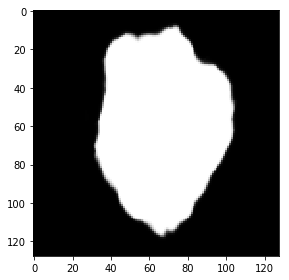

In [341]:
imshow(np.squeeze(val_mask[2]))
plt.show()